# Simulering Bemanning og Skiftdesign

**2. Simulering av bemanningsbehov og skiftdesign**<br>
<br>
**Formål**: Beregne bemanningsbehovet basert på forventet antall pasienter og skifttider, og sammenligne dette med eksisterende bemanning.<br>
**Hvordan**: Bruk data om pasientankomster og gjennomsnittlig liggetid til å forutsi antall pasienter på avdelingen til ulike tider av døgnet. Deretter sammenligner du dette med nåværende skiftdesign og bemanning for å identifisere under- eller overdekning.<br>
**Resultat**: Avdekke perioder hvor bemanningen er for lav, og evaluere hvordan skiftplanlegging kan optimaliseres.<br>

## Import libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Formål**: Simulere bemanningsbehov basert på pasientvolum, skiftplaner og kapasitet.<br>
<br>
**Nødvendig data**:<br>
<br>
1. Antall pasientankomster per time/dag.<br>
2. Skifttider for helsepersonell.<br>
3. Krav til bemanning per pasient (f.eks. antall sykepleiere per pasient).<br>

## Input data

In [20]:
avg_daily_admissions = 4  # Gjennomsnittlig daglige ankomster
avg_length_of_stay = 10  # Gjennomsnittlig liggetid (dager)
patients_per_nurse = 2  # Antall pasienter per sykepleier
total_beds = 26  # Antall senger
shifts_per_day = 3  # Antall skift per dag
iterations = 1000  # Antall simuleringer
days_in_year = 365  # Simuler for ett år
shifts_per_year = shifts_per_day*days_in_year

## Simulering underbemannede skift

In [24]:
understaffed_shifts = 0
overstaffed_shifts = 0
total_shifts = 0
staffed_shifts_data = []

for _ in range(iterations):
    yearly_understaffed_shifts = 0  # Teller hvor mange skift per år med underbemanning
    yearly_overstaffed_shifts = 0  # Teller hvor mange skift per år med overbemanning
    patients_on_ward = []  # Liste for å holde oversikt over pasienter som allerede ligger inne
    
    for day in range(days_in_year):
        new_admissions = np.random.poisson(avg_daily_admissions)  # Simulerer nye pasienter
        lengths_of_stay = np.random.exponential(avg_length_of_stay, new_admissions)  # Simulerer liggetider

        # Legg til nye pasienter som skal legges inn
        patients_on_ward.extend(lengths_of_stay)
        
        # Oppdater liggetidene for pasienter som allerede er inne
        patients_on_ward = [stay - 1 for stay in patients_on_ward]  # Reduserer liggetiden med 1 for hver dag
        patients_on_ward = [stay for stay in patients_on_ward if stay > 0]  # Fjern pasienter som er utskrevet

        # Beregn total antall pasienter som trenger pleie i dag
        total_patients = len(patients_on_ward)

        # Beregn antall sykepleiere som trengs per skift
        nurses_needed_per_shift = total_patients / patients_per_nurse / shifts_per_day

        actual_nurses = 6  # Faktisk antall sykepleiere per skift

        # Simuler skiftene for dagen
        for shift in range(shifts_per_day):
            total_shifts += 1  # Oppdater totalt antall skift
            if nurses_needed_per_shift > actual_nurses:
                understaffed_shifts += 1  # Underbemanning i dette skiftet
                yearly_understaffed_shifts += 1  # Tell daglig underbemanning
            elif nurses_needed_per_shift < actual_nurses:
                overstaffed_shifts += 1
                yearly_overstaffed_shifts += 1
            staffed_shifts_data.append(nurses_needed_per_shift)

    # Sjekk om det har vært underbemanning i løpet av året
    print(f"Underbemannede skift i dette året: {yearly_understaffed_shifts}")
    print(f"Underbemannede skift i dette året (i %): {round((yearly_understaffed_shifts/total_shifts)*100,2)}%")
    print(f"Overbemannede skift i dette året: {yearly_overstaffed_shifts}")
    print(f"Overbemannede skift i dette året (i %): {round((yearly_overstaffed_shifts/total_shifts)*100,2)}%")

Underbemannede skift i dette året: 585
Underbemannede skift i dette året (i %): 53.42%
Overbemannede skift i dette året: 456
Overbemannede skift i dette året (i %): 41.64%
Underbemannede skift i dette året: 621
Underbemannede skift i dette året (i %): 28.36%
Overbemannede skift i dette året: 411
Overbemannede skift i dette året (i %): 18.77%
Underbemannede skift i dette året: 561
Underbemannede skift i dette året (i %): 17.08%
Overbemannede skift i dette året: 444
Overbemannede skift i dette året (i %): 13.52%
Underbemannede skift i dette året: 654
Underbemannede skift i dette året (i %): 14.93%
Overbemannede skift i dette året: 408
Overbemannede skift i dette året (i %): 9.32%
Underbemannede skift i dette året: 294
Underbemannede skift i dette året (i %): 5.37%
Overbemannede skift i dette året: 732
Overbemannede skift i dette året (i %): 13.37%
Underbemannede skift i dette året: 732
Underbemannede skift i dette året (i %): 11.14%
Overbemannede skift i dette året: 297
Overbemannede ski

## Resultater

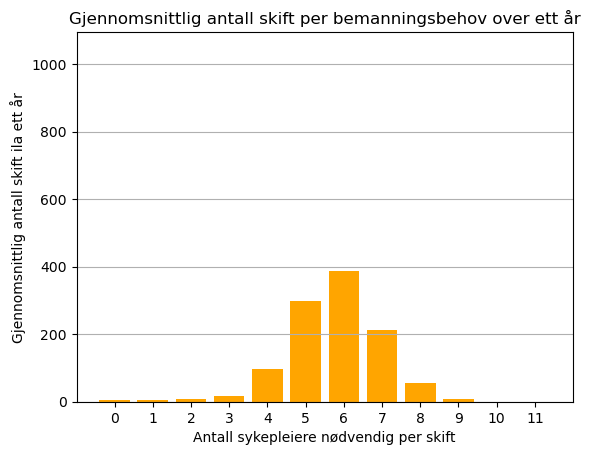

Prosentandel skift med underbemanning: 54.55%
Prosentandel skift med overbemanning: 39.31%
Prosentandel skift med riktig bemanning: 6.14%


In [26]:
prosent_underbemannet_skift = understaffed_shifts / total_shifts * 100
prosent_overbemannet_skift = overstaffed_shifts / total_shifts * 100

# Forbered data for visualisering
max_nurses_needed = int(max(staffed_shifts_data)) + 1  # Finn maksimum nødvendig sykepleiere
shift_counts = [0] * max_nurses_needed  # Liste for å telle antall skift for hver sykepleier
for nurses_needed in staffed_shifts_data:
    shift_counts[int(nurses_needed)] += 1

# Konverter til gjennomsnitt over alle simuleringer
average_shifts_needed = [count / iterations for count in shift_counts]

# Visualisering av gjennomsnittlig bemanningsbehov
plt.bar(range(max_nurses_needed), average_shifts_needed, color='orange')
plt.xlabel('Antall sykepleiere nødvendig per skift')
plt.ylabel('Gjennomsnittlig antall skift ila ett år')
plt.title('Gjennomsnittlig antall skift per bemanningsbehov over ett år')
plt.xticks(range(0, max_nurses_needed, 1))  # Vis alle unike verdier på x-aksen
plt.ylim(0, 365 * shifts_per_day)  # Sett y-aksen opp til maksimalt antall skift i året
plt.grid(axis='y')
plt.show()

# Resultat: Hvor ofte er skift underbemannet?
print(f"Prosentandel skift med underbemanning: {prosent_underbemannet_skift:.2f}%")
print(f"Prosentandel skift med overbemanning: {prosent_overbemannet_skift:.2f}%")
print(f"Prosentandel skift med riktig bemanning: {(100 - (prosent_underbemannet_skift + prosent_overbemannet_skift)):.2f}%")

**Verdi for sykehuset**:<br>
<br>
1. Forstå hvor ofte avdelingen kan ha for lav bemanning.<br>
2. Planlegge bemanning bedre ved å bruke data om faktiske pasientbehov.<br>